<a href="https://colab.research.google.com/github/Sidd1609/Credit_Card_Fraud_Detection/blob/master/Tans_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


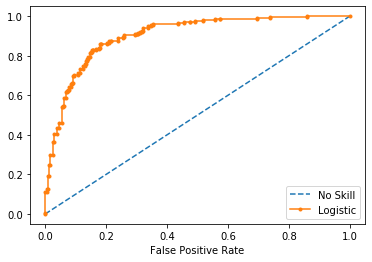

In [0]:
#ROC curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.legend()
pyplot.show()

In [0]:
#Classification (train and test)
import pandas as pd
from google.colab import files

In [0]:
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf


In [0]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Amount']

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [0]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 216 fraud data points and 93683 regular data points.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
print("Size of training set: ", X_train.shape)

Size of training set:  (75120, 30)


In [0]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [0]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
#K-FOLD algorithm
from sklearn.model_selection import KFold  
kf = KFold(n_splits=2) 
kf.get_n_splits(X) 
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Text(0, 0.5, 'Frequency')

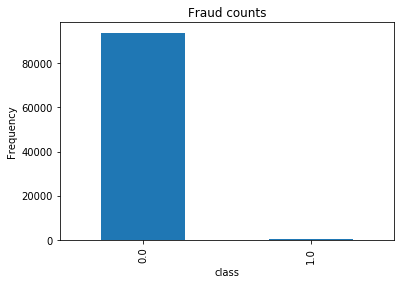

In [0]:
target = pd.value_counts(data['Class'],sort=True).sort_index()
target.plot(kind = 'bar')
plt.title("Fraud counts")
plt.xlabel("class")
plt.ylabel("Frequency")

In [0]:
X = data.loc[:,data.columns !='Class']
y = data.loc[:,data.columns =='Class']

In [0]:
number_fraud_records = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [0]:
normal_indices = data[data.Class == 0].index
random_normal_indices = np.random.choice(normal_indices,number_fraud_records,replace = False)
random_normal_indices = np.array(random_normal_indices)
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

In [0]:
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  432


In [0]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(X_undersample,y_undersample,test_size = 0.2, random_state = 0)

print("")
print("Number of transactions train dataset: ", len(X_train_undersample))
print("Number of transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  75120
Number transactions test dataset:  18780
Total number of transactions:  93900

Number of transactions train dataset:  345
Number of transactions test dataset:  87
Total number of transactions:  432


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.model_selection import KFold, cross_val_score

In [0]:
def Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle = False)
    C_param_range = [0.01,0.1,1,10,100]
    results_table = pd.DataFrame(index = range(len(C_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = C_param_range
    j = 0
    for C_param in C_param_range:
        print('-------------------------')
        print('C parameter: ', C_param)
        print('-------------------------')
        print('')
        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):
            lr = LogisticRegression(C = C_param, penalty = 'l1')

            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
        
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    print("Best C score:",best_c)
    return best_c
    best_c = Kfold_scores(X_train_undersample,y_train_undersample)

Logistic: f1=0.841 auc=0.898


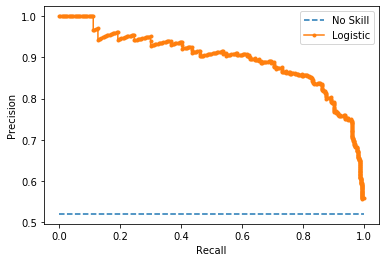

In [0]:
#precion and recall
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

lr_probs = model.predict_proba(testX)

lr_probs = lr_probs[:, 1]

yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

pyplot.legend()

pyplot.show()

In [0]:
#EDA analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [76]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93895,64635,-0.703660,0.030938,2.187296,-0.561172,0.437259,0.885211,0.046137,0.321082,0.434080,-0.559013,0.125464,0.204269,-0.724880,-0.434710,-0.745491,0.419558,-0.783273,0.257913,-0.328792,0.001839,-0.002984,0.162524,-0.171664,-0.831475,-0.278265,0.176700,-0.067569,-0.112620,23.42,0.0
93896,64637,1.277595,0.454794,-0.125866,1.113676,-0.023589,-1.210690,0.505676,-0.317333,-0.176815,0.065553,-0.475950,-0.141739,-0.677255,0.697800,0.755743,-0.185718,-0.273878,-0.288082,-0.248515,-0.199564,-0.005112,0.011904,-0.136580,0.388051,0.830026,-0.294142,-0.012218,0.009414,1.00,0.0
93897,64637,1.109161,0.000825,1.361188,1.420410,-0.918673,0.013521,-0.636121,0.186146,0.694237,-0.121446,-0.202007,0.513733,-0.004144,-0.210777,0.811023,-0.104027,-0.022651,-0.353560,-0.965559,-0.187478,0.169790,0.708270,-0.014479,0.415553,0.390344,-0.232143,0.085535,0.034939,1.00,0.0
93898,64637,-0.780229,1.196878,0.946185,-0.149437,0.001161,-0.179450,0.294276,0.533023,-0.523446,-0.586802,-0.787776,-0.021733,0.068299,0.476465,1.108417,0.180271,-0.123154,-0.584072,-0.163838,-0.006594,-0.184478,-0.591717,0.031935,-0.450369,-0.174179,0.134214,0.150856,0.050276,16.00,0.0


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

features = list(df)

pca_result = pca.fit_transform(df[features].values)

pca_df = pd.DataFrame()
pca_df['Time'] = df['Time']
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
from ggplot import *
chart = ggplot( pca_df, aes(x='pca-one', y='pca-two', color='species') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by species")
chart

In [0]:
import time
from sklearn.manifold import TSNE

# Start t-SNE algorithm
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)
tsne_results = tsne.fit_transform(df[features].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
df_tsne = pd.DataFrame()
df_tsne['species'] = df['species']
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

# Create chart and display it
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='species') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by species")
chart

In [0]:
#Confusion Matrix 
#Package problem
from pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()


In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_right, y_predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_right, y_predicted)) 
print ('Report : ')
print (classification_report(y_actual, y_predicted))